# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso ,ElasticNet #import necessary modules
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression #import neccesary modules
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE #import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
import datetime as dt
import statsmodels.api as sm


# Loading the data

In [2]:
df= pd.read_excel('Quickfreightdata.xlsx')
df

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE
0,136539,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00
1,136954,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00
2,136701,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00
3,136955,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00
4,136995,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18734,147270,R,707,26405,1500.00,84104,2015-09-01 11:00:00,2015-09-01 18:00:00,85353,2015-09-03 08:30:00,2015-09-03 08:30:00,N,2015-08-28 17:19:00
18735,147271,R,1230,42500,0.00,84088,2015-08-31 20:00:00,2015-08-31 20:00:00,76102,2015-09-03 13:00:00,2015-09-03 13:00:00,N,2015-08-28 17:22:00
18736,148075,R,1924,42000,2500.00,78521,2015-09-04 09:00:00,2015-09-04 17:00:00,95380,2015-09-07 07:00:00,2015-09-07 07:00:00,N,2015-09-03 08:31:00
18737,148223,R,2185,40000,5300.00,4915,2015-09-03 14:30:00,2015-09-03 14:30:00,29209,2015-09-07 06:00:00,2015-09-07 06:00:00,N,2015-09-03 13:08:00


# BASIC DATA ANALYSIS

In [3]:
df.describe()

,ORDER_NBR,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,CREATED_DATE
count,18739.000000,18739.000000,18739.000000,18733.000000,18479,18435,18410,18353,18739
mean,144575.934255,588.220556,25219.585837,954.230941,2015-08-21 06:51:55.269224448,2015-08-21 16:36:54.877135872,2015-08-22 00:32:46.275937024,2015-08-24 04:43:57.103470848,2015-08-15 11:22:56.407492608
min,136474.000000,0.000000,0.000000,0.000000,2014-09-26 12:00:00,2014-09-26 12:00:00,2000-08-28 07:30:00,2005-09-14 16:00:00,2015-07-01 06:39:00
25%,140427.000000,254.000000,8000.000000,400.000000,2015-07-29 08:00:00,2015-07-29 15:00:00,2015-07-30 08:00:00,2015-07-30 12:15:00,2015-07-22 15:49:00
50%,144599.000000,436.000000,28192.000000,700.000000,2015-08-21 08:00:00,2015-08-21 14:00:00,2015-08-22 08:00:00,2015-08-22 12:00:00,2015-08-17 11:42:00
75%,148641.500000,716.000000,42000.000000,1300.000000,2015-09-12 12:00:00,2015-09-13 00:00:00,2015-09-14 10:00:00,2015-09-14 15:00:00,2015-09-04 17:45:30
max,152775.000000,3733.000000,300000.000000,8000.000000,2015-11-17 00:00:00,2020-08-05 12:00:00,2051-08-13 11:00:00,2051-09-09 15:00:00,2015-09-29 19:14:00
std,4720.648230,511.968568,16309.867000,938.818390,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

ORDER_NBR                            int64
EQUIPMENT_TYPE                      object
CUSTOMER_MILES                       int64
WEIGHT                               int64
ORDER_COST                         float64
FIRST_PICK_ZIP                      object
FIRST_PICK_EARLY_APPT       datetime64[ns]
FIRST_PICK_LATE_APPT        datetime64[ns]
LAST_DELIVERY_ZIP                   object
LAST_DELIVERY_EARLY_APPT    datetime64[ns]
LAST_DELIVERY_LATE_APPT     datetime64[ns]
IS_HAZARDOUS                        object
CREATED_DATE                datetime64[ns]
dtype: object

In [5]:
df.columns

Index(['ORDER_NBR', 'EQUIPMENT_TYPE', 'CUSTOMER_MILES', 'WEIGHT', 'ORDER_COST',
       'FIRST_PICK_ZIP', 'FIRST_PICK_EARLY_APPT', 'FIRST_PICK_LATE_APPT',
       'LAST_DELIVERY_ZIP', 'LAST_DELIVERY_EARLY_APPT',
       'LAST_DELIVERY_LATE_APPT', 'IS_HAZARDOUS', 'CREATED_DATE'],
      dtype='object')

# CHECKING FOR AND VISUALISING THE NULL VALUES IN THE DATASET 

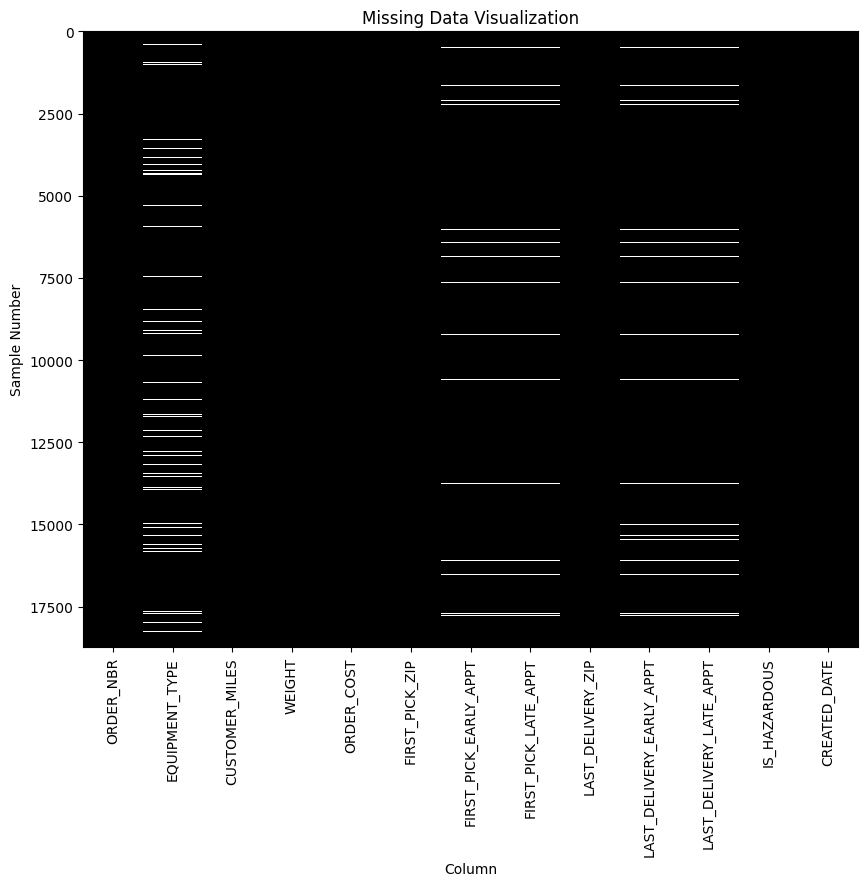

ORDER_NBR                      0
EQUIPMENT_TYPE              1011
CUSTOMER_MILES                 0
WEIGHT                         0
ORDER_COST                     6
FIRST_PICK_ZIP                 0
FIRST_PICK_EARLY_APPT        260
FIRST_PICK_LATE_APPT         304
LAST_DELIVERY_ZIP              0
LAST_DELIVERY_EARLY_APPT     329
LAST_DELIVERY_LATE_APPT      386
IS_HAZARDOUS                   0
CREATED_DATE                   0
dtype: int64


In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xticks(ticks=range(len(df.columns)), labels=df.columns, rotation=90)

plt.xlabel("Column")
plt.ylabel("Sample Number")
plt.title("Missing Data Visualization")

plt.show()
print(df.isna().sum())

# AFTER ANALYISING THE DATASET WE REALISED:
* ~97.2% OF THE VALUES LIE IN THE YEAR 2015, THUS WE ELIMINATED THE DATA FOR THE REST OF THE YEARS SUCH AS 2000,2007,2014,2019 AND 2051


* THE DATA THAT WAS IN YEARS SUCH AS 2000,2007,2014,2019 AND 2051 WAS ABSURD AND ASSUMED TO BE DATA ENTRY ERRORS


* MADE A NEW DATASET CALLED 'df_2015'


* DROPPED OUTLIER WITH ORDER NUMBER 141568 as it took >365 days to deliver


* CREATED A NEW COLUMN CALLED DAYS BY 'LAST_DELIVERY_LATE_APPT'- 'FIRST_PICK_EARLY_APPT'


* CONVERTED THE DAYS INTO NUMERICAL FORMAT


* DROPPED THE ROWS WHICH SHOWED DAYS < 0 , AS IT WAS CONSIDED A DATAENTRY MISTAKE


* FINALLY GOT 'df_2015' data

In [7]:
# selecting rowS. which lie in 2015
df_2015 = df[(df['FIRST_PICK_EARLY_APPT'].dt.year >=2015) & 
             (df['FIRST_PICK_EARLY_APPT'].dt.year <=2016) &
             (df['FIRST_PICK_LATE_APPT'].dt.year >=2015) &
             (df['FIRST_PICK_LATE_APPT'].dt.year <=2016) &
             (df['LAST_DELIVERY_EARLY_APPT'].dt.year >=2015) &
             (df['LAST_DELIVERY_EARLY_APPT'].dt.year <=2016) &
             (df['LAST_DELIVERY_LATE_APPT'].dt.year >=2015) &
             (df['LAST_DELIVERY_LATE_APPT'].dt.year <=2016)              
            ]
 
#rremoving outlier
df_2015=df_2015.drop(df_2015[df_2015['ORDER_NBR'] == 141568].index)

#creating new column called days
df_2015['Days']=df_2015['LAST_DELIVERY_LATE_APPT']-df_2015['FIRST_PICK_EARLY_APPT']

#converting days to numerical column 
df_2015['Days']=df_2015['Days'].dt.total_seconds() / (60 * 60)/24

#dropping values where days < 0
df_2015=df_2015.drop(df_2015[df_2015['Days'] <= 0].index)
df_2015

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE,Days
0,136539,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00,1.354167
1,136954,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00,1.083333
2,136701,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00,6.375000
3,136955,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00,1.083333
4,136995,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00,1.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18734,147270,R,707,26405,1500.00,84104,2015-09-01 11:00:00,2015-09-01 18:00:00,85353,2015-09-03 08:30:00,2015-09-03 08:30:00,N,2015-08-28 17:19:00,1.895833
18735,147271,R,1230,42500,0.00,84088,2015-08-31 20:00:00,2015-08-31 20:00:00,76102,2015-09-03 13:00:00,2015-09-03 13:00:00,N,2015-08-28 17:22:00,2.708333
18736,148075,R,1924,42000,2500.00,78521,2015-09-04 09:00:00,2015-09-04 17:00:00,95380,2015-09-07 07:00:00,2015-09-07 07:00:00,N,2015-09-03 08:31:00,2.916667
18737,148223,R,2185,40000,5300.00,4915,2015-09-03 14:30:00,2015-09-03 14:30:00,29209,2015-09-07 06:00:00,2015-09-07 06:00:00,N,2015-09-03 13:08:00,3.645833


# CHECKING MISSING VALUES IN NEW DATASET 

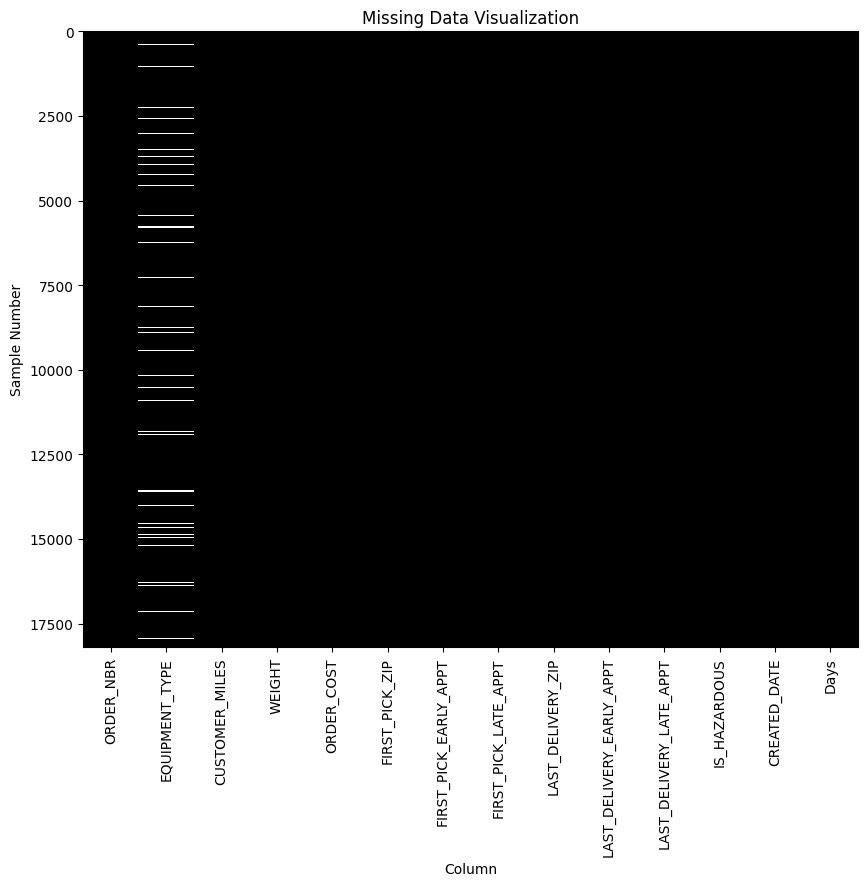

ORDER_NBR                     0
EQUIPMENT_TYPE              945
CUSTOMER_MILES                0
WEIGHT                        0
ORDER_COST                    1
FIRST_PICK_ZIP                0
FIRST_PICK_EARLY_APPT         0
FIRST_PICK_LATE_APPT          0
LAST_DELIVERY_ZIP             0
LAST_DELIVERY_EARLY_APPT      0
LAST_DELIVERY_LATE_APPT       0
IS_HAZARDOUS                  0
CREATED_DATE                  0
Days                          0
dtype: int64


In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(df_2015.isna(), aspect="auto", interpolation="nearest", cmap="gray")

plt.xticks(ticks=range(len(df_2015.columns)), labels=df_2015.columns, rotation=90)

plt.xlabel("Column")
plt.ylabel("Sample Number")
plt.title("Missing Data Visualization")

plt.show()
print(df_2015.isna().sum())

# NOW WE CAN SEE THERE ARE LESSER MISSING VALUES AND CAN CONDUCT DATA VISUALISATIONS NOW THAT THE DATA HAS BEEN CLEANED

# PLOTTING THE TIME SERIES OF 
* FIRST_PICK_EARLY_APPT, FIRST_PICK_LATE_APPT, LAST_DELIVERY_EARLY_APPT AND LAST_DELIVERY_LATE_APPT

<Figure size 2000x600 with 0 Axes>

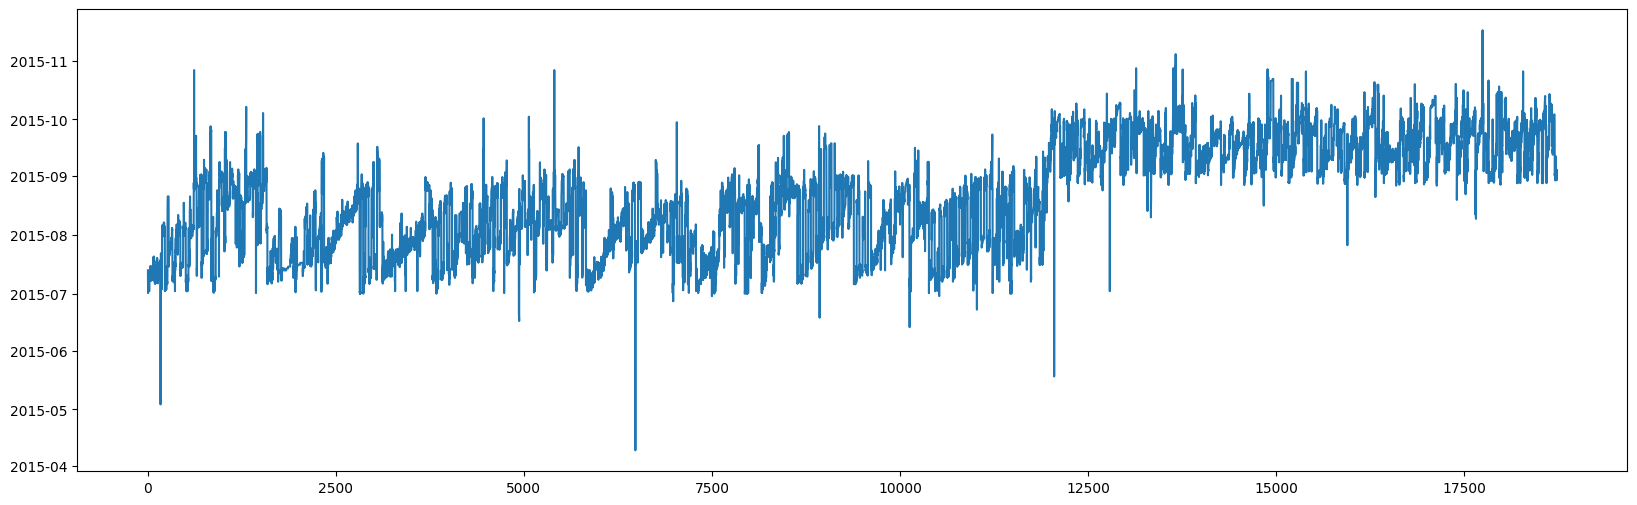

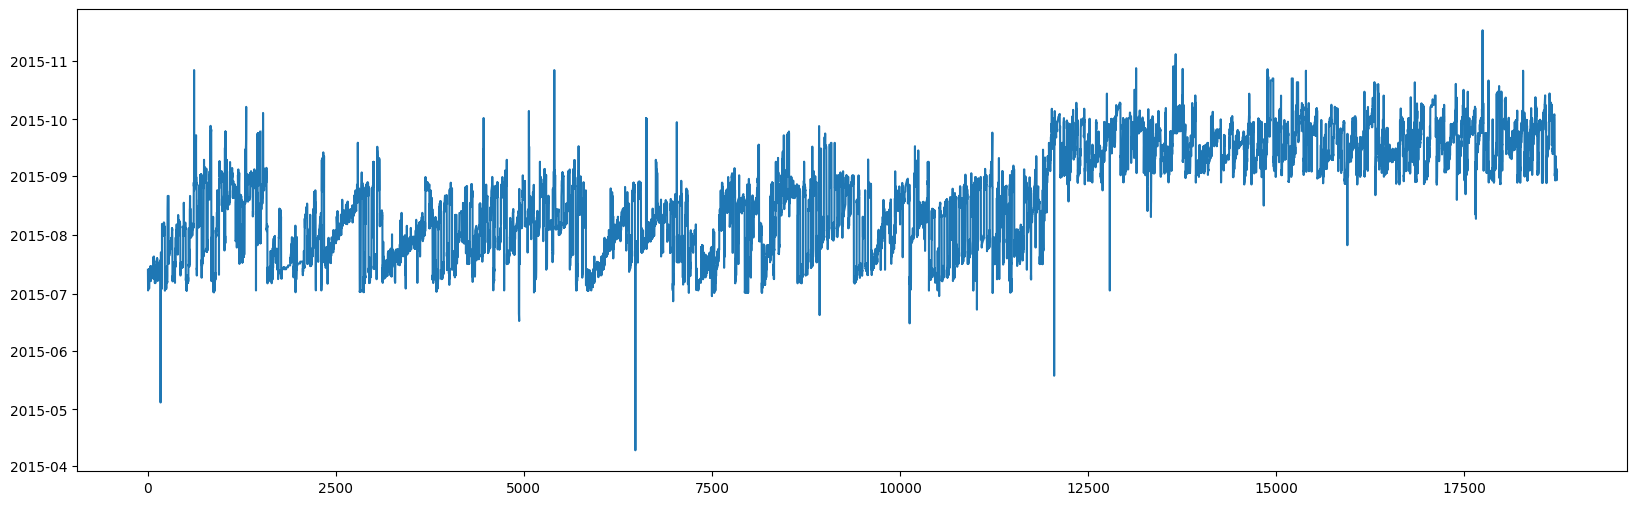

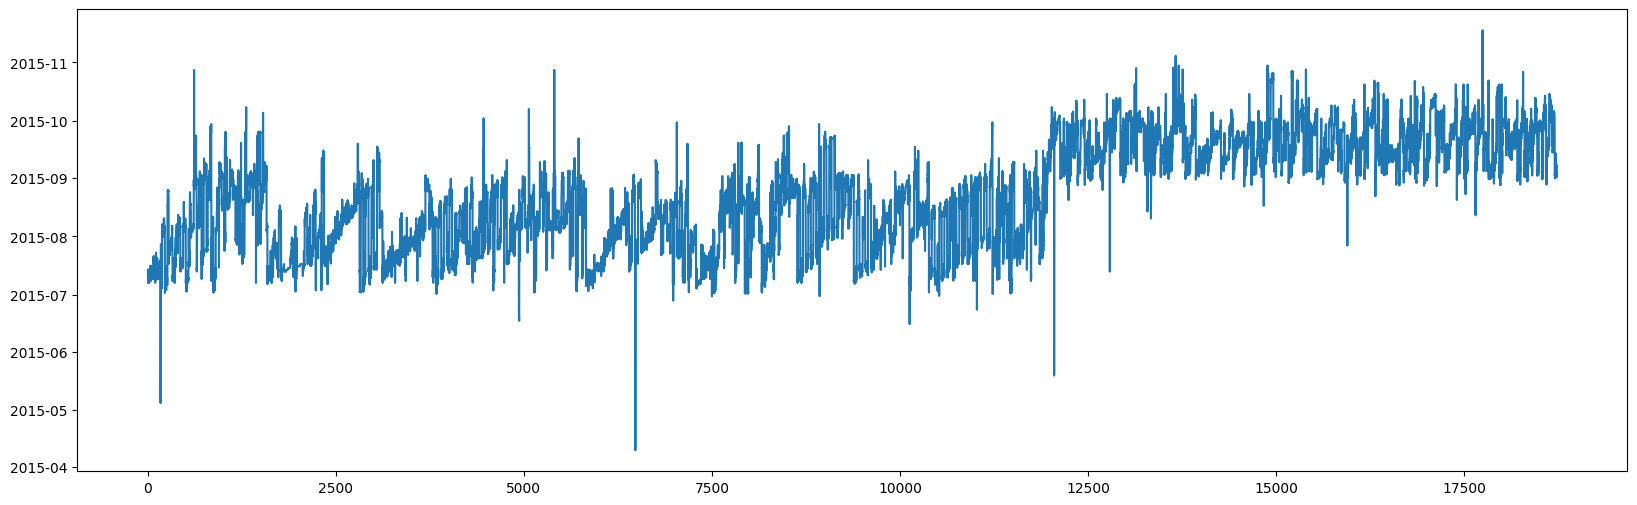

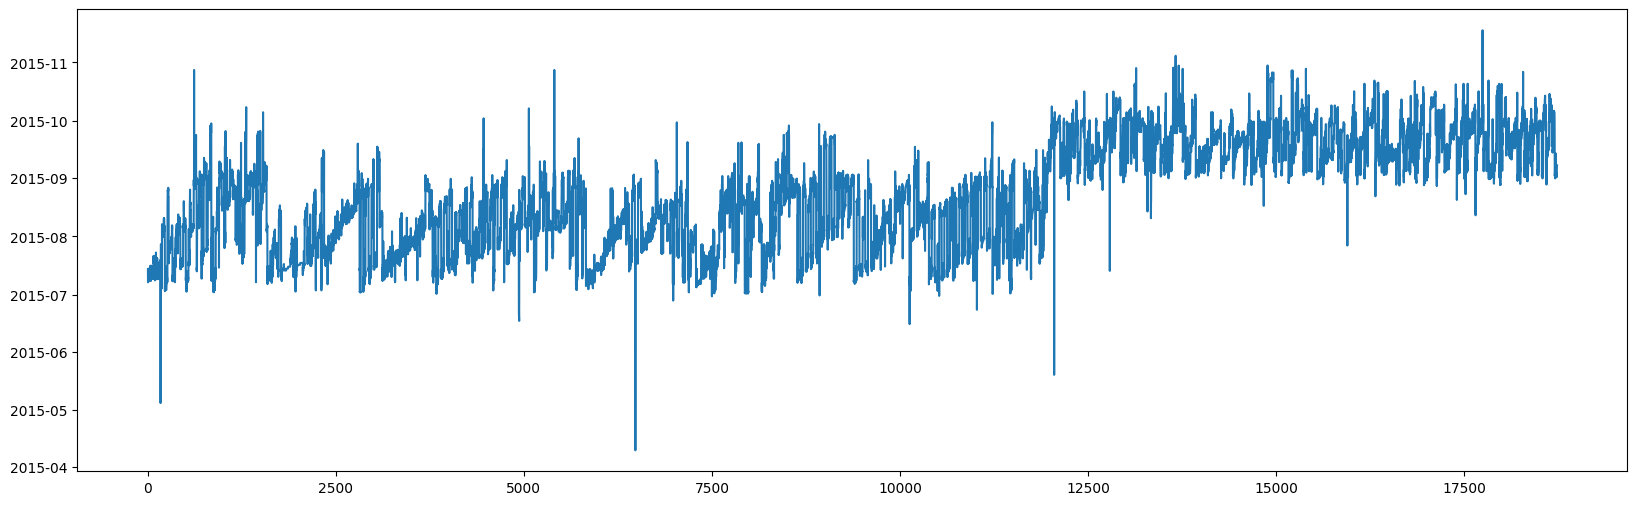

<Figure size 2000x600 with 0 Axes>

In [9]:
plt.figure(figsize=(20,6))
plt.plot(df_2015['FIRST_PICK_EARLY_APPT'])
plt.figure(figsize=(20,6))
plt.plot(df_2015['FIRST_PICK_LATE_APPT'])
plt.figure(figsize=(20,6))
plt.plot(df_2015['LAST_DELIVERY_EARLY_APPT'])
plt.figure(figsize=(20,6))
plt.plot(df_2015['LAST_DELIVERY_LATE_APPT'])
plt.figure(figsize=(20,6))


#  1. HOW IS THE SHIPMENT COST DISTRIBUTED

In [10]:
df_2015['ORDER_COST'].value_counts()

ORDER_COST
0.00       3235
600.00     1003
700.00      647
500.00      626
1000.00     581
           ... 
223.81        1
77.48         1
126.17        1
6400.00       1
2280.00       1
Name: count, Length: 746, dtype: int64

min cost: 0.0 | max cost: 8000.0


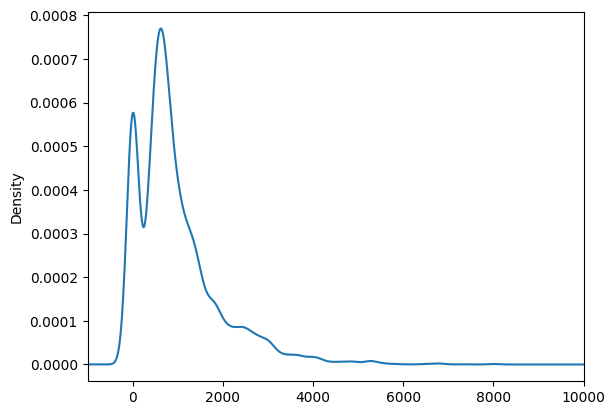

In [11]:
# Plot distribution of values in Marks column

df_2015['ORDER_COST'].plot(kind='kde')
plt.xlim([-1000,10000])
print (f"min cost: {df_2015['ORDER_COST'].min()} | max cost: {df_2015['ORDER_COST'].max()}")

1) This plot gives us an idea of how the cost is distributed min cost being 0 and maximum cost being 8000
2) Most of the cost is between 0-4000
3) 3235 orders have been shipped at the cost of 0 which shows that the company must have given out alot of discounts / provided free shipping for customers 

# 2. DOES SHIPMENT COST DEPEND ON THE DISTANCE

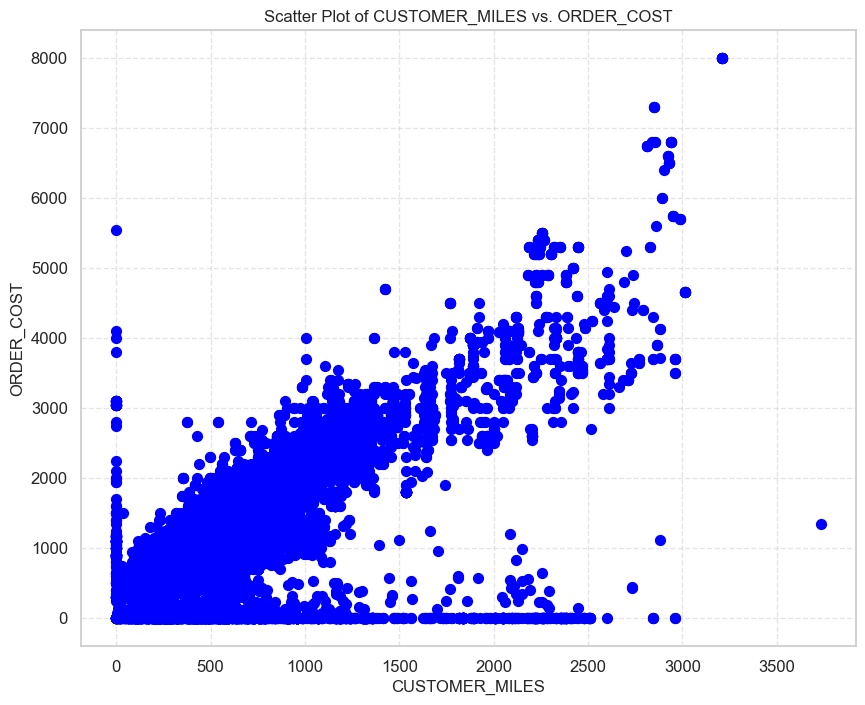

                ORDER_COST  CUSTOMER_MILES
ORDER_COST         1.00000         0.62343
CUSTOMER_MILES     0.62343         1.00000


In [12]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))

x = df_2015['CUSTOMER_MILES']
y = df_2015['ORDER_COST']

scatter = plt.scatter(x, y, c='blue', s=50)

plt.title('Scatter Plot of CUSTOMER_MILES vs. ORDER_COST')

plt.xlabel('CUSTOMER_MILES')
plt.ylabel('ORDER_COST')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
print(df_2015[['ORDER_COST','CUSTOMER_MILES']].corr())

1) This above graph shows strong positive correlation (0.62) between miles and the cost
2) Thus we can conclude the cost depends on the number of miles shipped

# 3. IS THE WEIGHT OF THE SHIPMENT AN IMPORTANT PREDICTOR TO DECIDE THE SHIPMENT COST ?

In [13]:
df_2015[df_2015['ORDER_COST']==8000]

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE,Days
3749,142559,R,3212,37909,8000.0,93933,2015-08-06 00:01:00,2015-08-06 23:59:00,23111,2015-08-12,2015-08-12,N,2015-08-05 12:07:00,5.999306
3750,142559,R,3212,37909,8000.0,91746,2015-08-07 06:00:00,2015-08-07 12:00:00,23111,2015-08-12,2015-08-12,N,2015-08-05 12:07:00,4.750000
3751,142559,R,3212,37909,8000.0,93654,2015-08-06 08:00:00,2015-08-06 21:00:00,23111,2015-08-12,2015-08-12,N,2015-08-05 12:07:00,5.666667
3752,142559,R,3212,37909,8000.0,95615,2015-08-06 07:00:00,2015-08-06 18:00:00,23111,2015-08-12,2015-08-12,N,2015-08-05 12:07:00,5.708333
3753,142559,R,3212,37909,8000.0,92507,2015-08-06 07:00:00,2015-08-06 21:00:00,23111,2015-08-12,2015-08-12,N,2015-08-05 12:07:00,5.708333
3754,142559,R,3212,37909,8000.0,93631,2015-08-06 07:00:00,2015-08-06 23:30:00,23111,2015-08-12,2015-08-12,N,2015-08-05 12:07:00,5.708333
3755,142559,R,3212,37909,8000.0,93654,2015-08-06 08:00:00,2015-08-06 22:00:00,23111,2015-08-12,2015-08-12,N,2015-08-05 12:07:00,5.666667


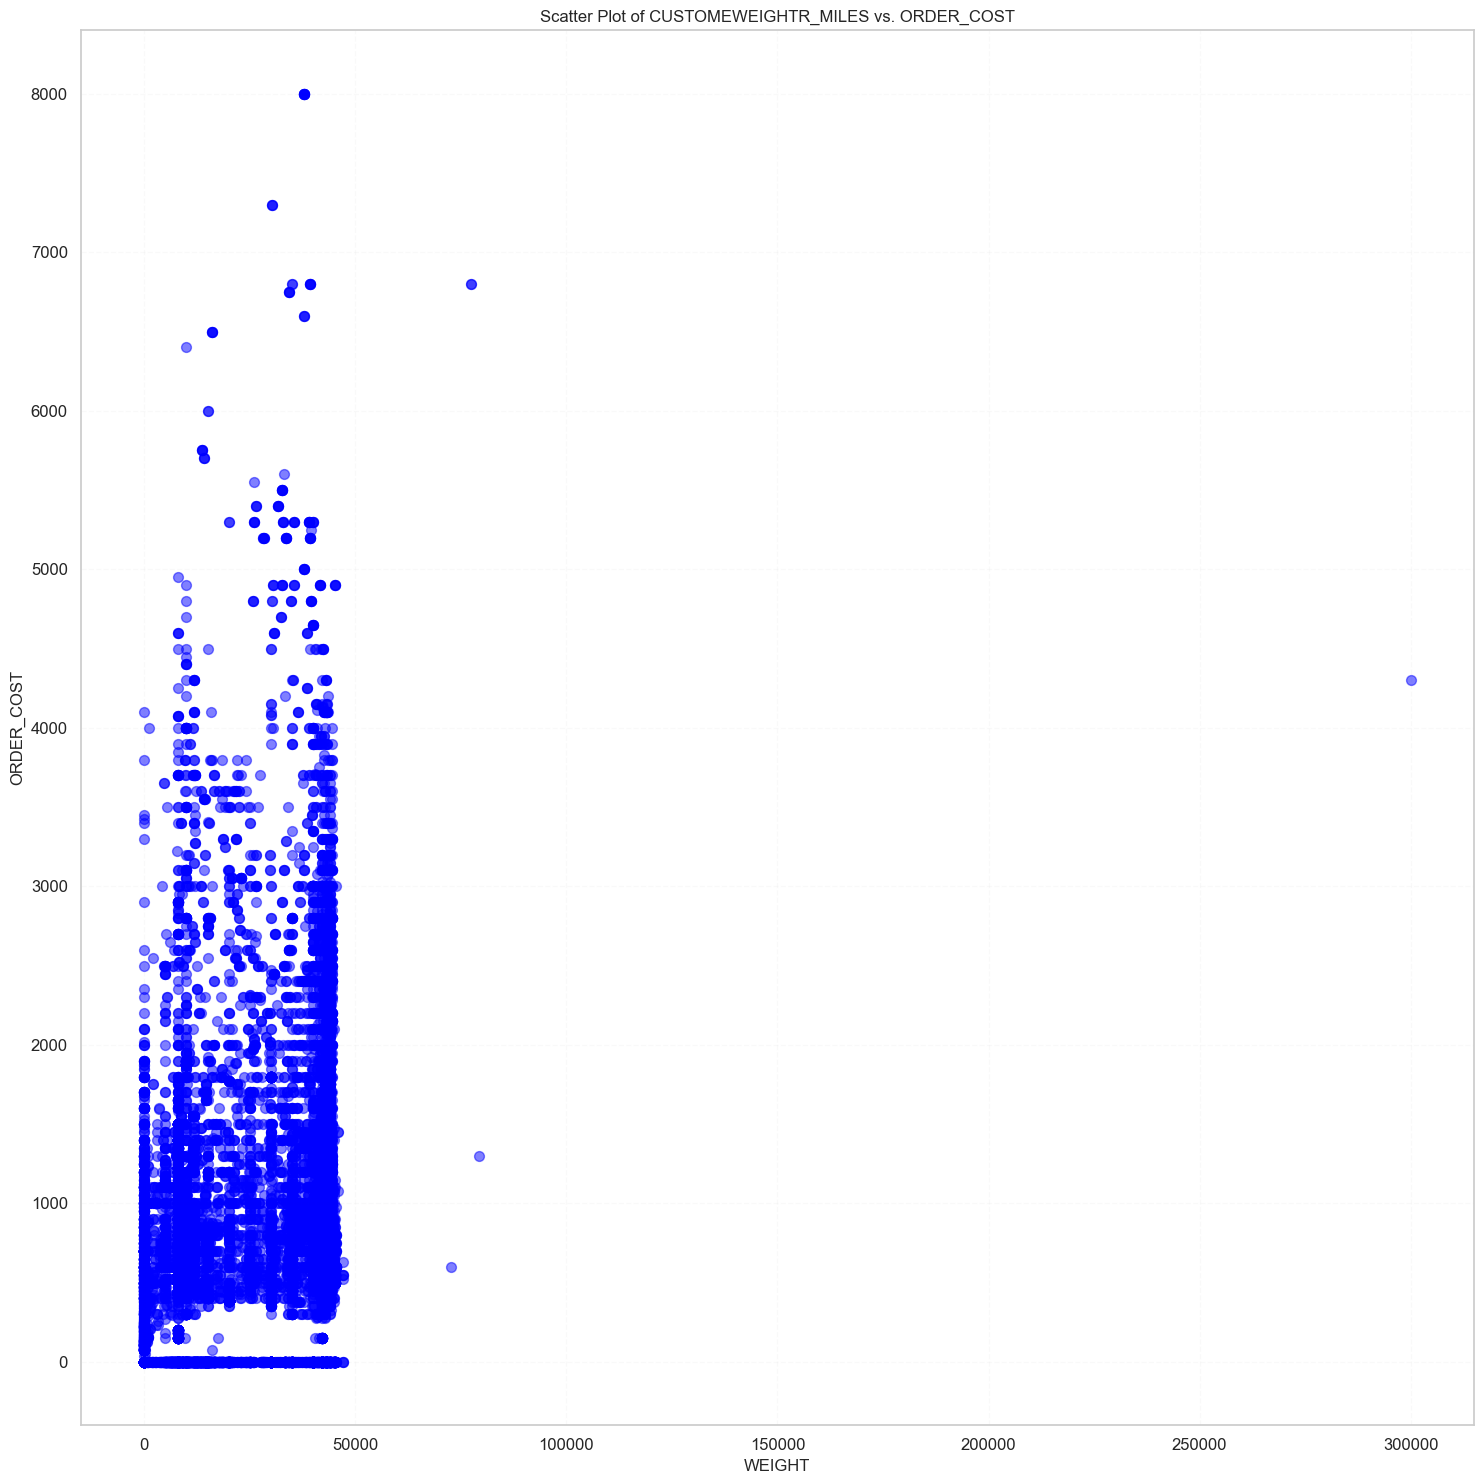

In [14]:
# Set Seaborn style
sns.set(style="whitegrid")
# Create a figure with a larger size
plt.figure(figsize=(15, 15))
# Define data
x = df_2015['WEIGHT']
y = df_2015['ORDER_COST']
# Create a scatter plot
scatter = plt.scatter(x, y, c='blue', s=50, alpha=0.5)
# Add a title and labels
plt.title('Scatter Plot of CUSTOMEWEIGHTR_MILES vs. ORDER_COST')
plt.xlabel('WEIGHT')
plt.ylabel('ORDER_COST')

# Customize tick labels (optional)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.1)

# Customize legend (optional)
# plt.legend(['Data Points'], loc='upper right')

# Display the plot
plt.tight_layout()  # Improves spacing between subplots
plt.show()


1) We can see the cost doesnt depend on the weight as much as the number of miles shipped
2) We can also see that Even for a package of weight around 50000 the cost varies from 0 to 5000
3) The outlier (package of weight 300000) if observed carefully costs lesser than

# 4. DOES THE SHIPMENT COST DEPEND ON THE SOURCE AND DESTINATION ? 

In [15]:
df_2015['FIRST_PICK_ZIP']=df['FIRST_PICK_ZIP'].astype(str)
df_2015['LAST_DELIVERY_ZIP']=df['LAST_DELIVERY_ZIP'].astype(str)

In [16]:
df_2015

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE,Days
0,136539,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00,1.354167
1,136954,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00,1.083333
2,136701,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00,6.375000
3,136955,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00,1.083333
4,136995,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00,1.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18734,147270,R,707,26405,1500.00,84104,2015-09-01 11:00:00,2015-09-01 18:00:00,85353,2015-09-03 08:30:00,2015-09-03 08:30:00,N,2015-08-28 17:19:00,1.895833
18735,147271,R,1230,42500,0.00,84088,2015-08-31 20:00:00,2015-08-31 20:00:00,76102,2015-09-03 13:00:00,2015-09-03 13:00:00,N,2015-08-28 17:22:00,2.708333
18736,148075,R,1924,42000,2500.00,78521,2015-09-04 09:00:00,2015-09-04 17:00:00,95380,2015-09-07 07:00:00,2015-09-07 07:00:00,N,2015-09-03 08:31:00,2.916667
18737,148223,R,2185,40000,5300.00,4915,2015-09-03 14:30:00,2015-09-03 14:30:00,29209,2015-09-07 06:00:00,2015-09-07 06:00:00,N,2015-09-03 13:08:00,3.645833


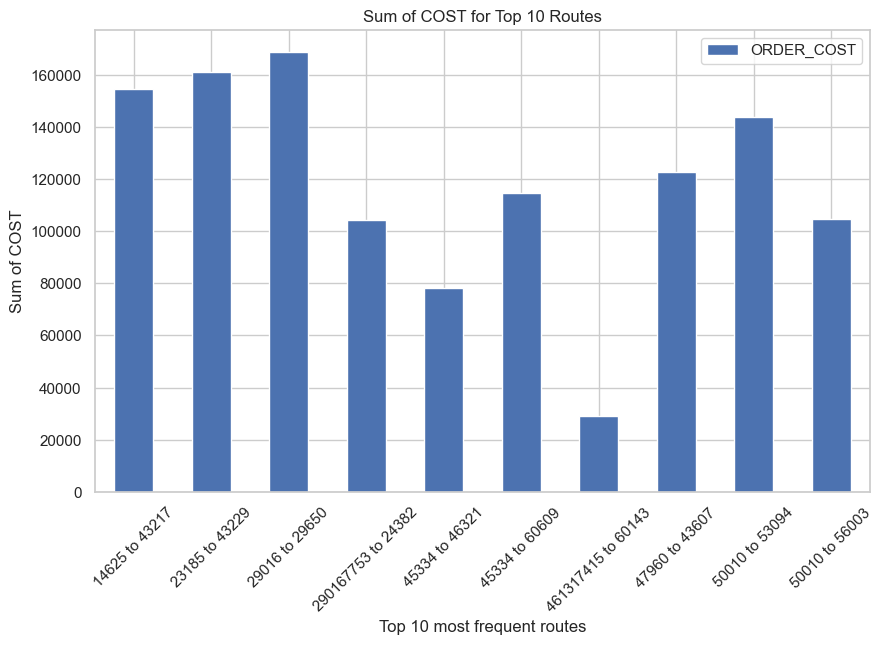

In [17]:
#creating new column called route which maps the zip code of pick up and drop
df_2015['route'] = df_2015['FIRST_PICK_ZIP'] + ' to ' + df_2015['LAST_DELIVERY_ZIP']

#taking the top 10 values 
top_10_routes=df_2015['route'].value_counts().head(10)

# Find the top 5 most frequent routes
top_route_values = top_10_routes.index[:10]


top_routes_df = df_2015[df_2015['route'].isin(top_route_values)][['route', 'ORDER_COST']]


pivot_table = top_routes_df.pivot_table(index='route', values='ORDER_COST', aggfunc='sum')


pivot_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Top 10 most frequent routes')
plt.ylabel('Sum of COST')
plt.title('Sum of COST for Top 10 Routes')
plt.xticks(rotation=45)
plt.show()


1) X axis shows the top 10 routes in the shipping company
2) Y axis shows the total the costs of each route
3) Thus we can conclude the shipment cost depends on source and destination

# 5. DRAW THE PAIRPLOT AND WRITE A SUMMARY ON YOUR OBSERVATIONS

In [18]:
#creating pairplot dataframe
pairplot_df=df_2015[['CUSTOMER_MILES','WEIGHT', 'ORDER_COST','Days']]
pairplot_df

,CUSTOMER_MILES,WEIGHT,ORDER_COST,Days
0,802,42000,0.00,1.354167
1,0,40500,875.00,1.083333
2,774,0,88.14,6.375000
3,0,40500,875.00,1.083333
4,0,40500,875.00,1.083333
...,...,...,...,...
18734,707,26405,1500.00,1.895833
18735,1230,42500,0.00,2.708333
18736,1924,42000,2500.00,2.916667
18737,2185,40000,5300.00,3.645833


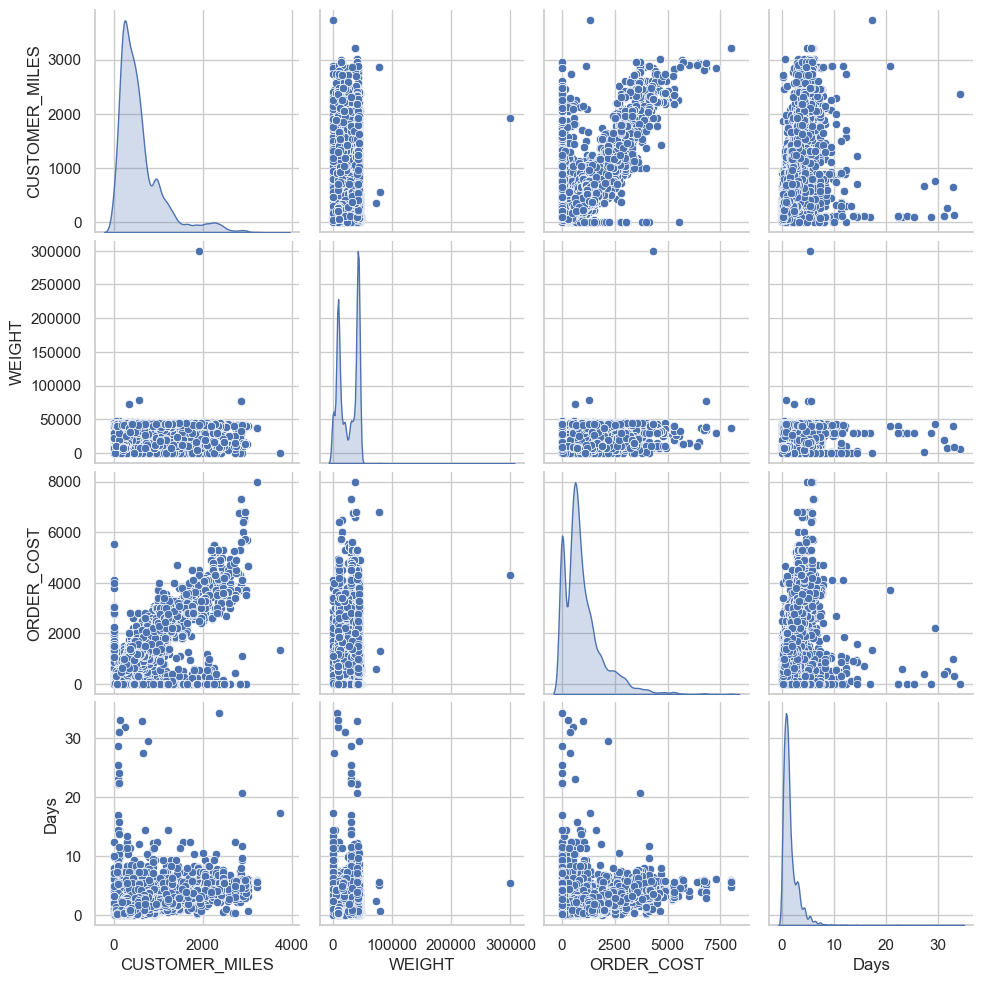

In [19]:
sns.pairplot(pairplot_df, diag_kind='kde')
plt.show()

1) Here are correlation plots between all the numerical variables 'CUSTOMER_MILES','WEIGHT', 'ORDER_COST' and 'Days'
2) We can see the strong positive correlation between customer miles and order cost
3) We can also see the kde plots of each variable
4) We can see the outliers also here eg: there is only one shipment that weighs '300000'
5) On the 'days' kde plot we can see the company has performed well in shipping the most of the parcels in 10 days or less accross the country
6) If we look at the customer miles and days plot we can see the company has delivered on time , even high amount of miles didnt take >30 days to deliver and most of the parcels were delivered in 0-10days

# 6. IDENTIFY THE NUMERICAL VARIABLES AND DRAW KERNEL DENSITY PLOTS

In [20]:
# Numeric variables are CUSTOMER_MILES,WEIGHT,ORDER_COST,Days

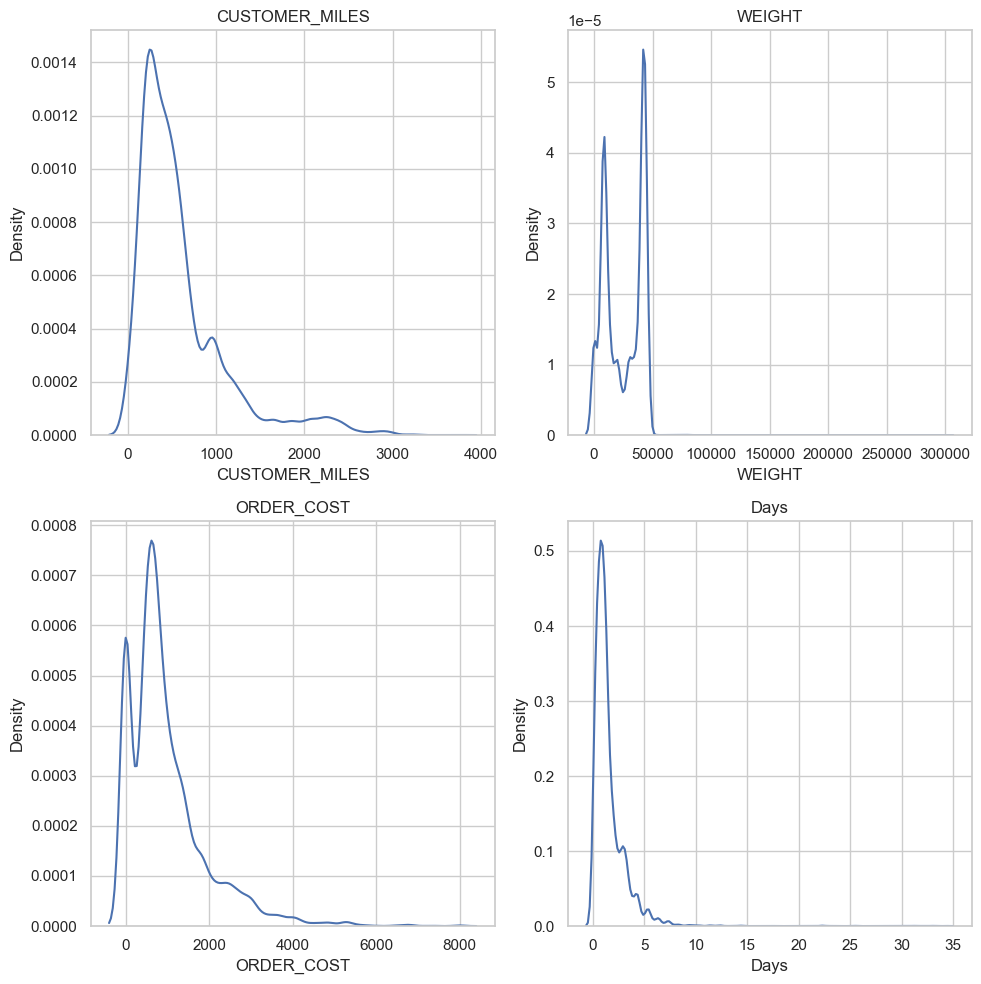

In [21]:
# Numeric variables are 'CUSTOMER_MILES','WEIGHT','ORDER_COST' AND 'Days'
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features
features = ['CUSTOMER_MILES', 'WEIGHT', 'ORDER_COST', 'Days']


plt.figure(figsize=(10,10))


for i in range(len(features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df_2015[features[i]])
    plt.title(features[i])
    
plt.tight_layout()
plt.show()

1) The numerical columns are: 'CUSTOMER_MILES', 'WEIGHT', 'ORDER_COST' and 'Days' rest are categorical
2) These only show the kde plots of each variable
3) We can see the company has performed well in shipping the most of the parcels in 10 days or less accross the country
4) Order cost is mainly between 0-5000
5) And weights are from 0-50,000, with one outlier at 300,000


# 7. DRAW THE CORRELATION HEATMAP AND WRITE YOUR OBSERVATIONS

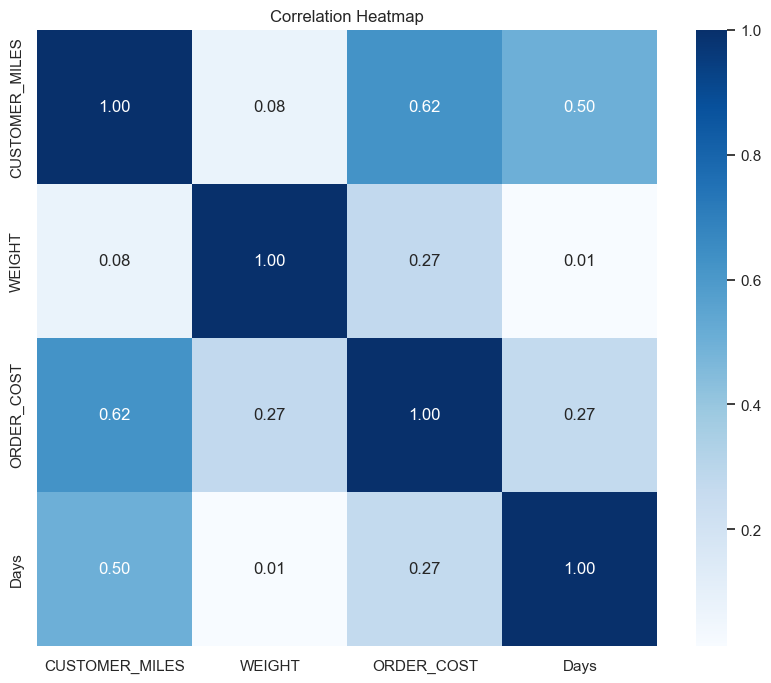

In [22]:
# Calculate correlation matrix using pairplot_df
correlation_matrix = pairplot_df.corr()


plt.figure(figsize=(10, 8))
sns.set(style="white")
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

1) This is a correlation heat map which shows that strength and direction of correlations between multiple variables using a color-coded matrix. It helps identify patterns and relationships in the data, showing which variables are positively, negatively, or not correlated with each other.
2) We can see order cost and customer miles has the highest correlation (one depends on the other) while weight and days has the least ~0 (one doesnt depend on the other)
3) We cannot see any negative correlation 

# 8. HOW DO YOU JUSTIFY WHETHER THE COST VARIES DEPENDING ON WHETHER THE ITEM IS HAZARDOUS OR NOT

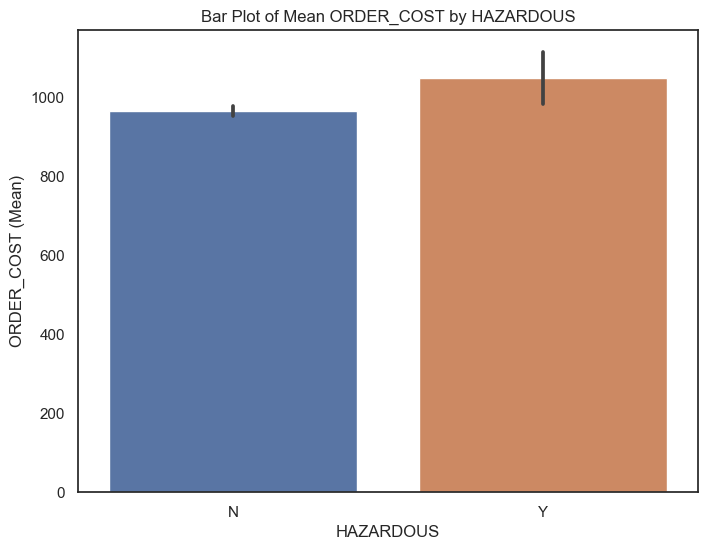

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='IS_HAZARDOUS', y='ORDER_COST', data=df_2015, estimator=np.mean)  

plt.xlabel('HAZARDOUS')
plt.ylabel('ORDER_COST (Mean)')
plt.title('Bar Plot of Mean ORDER_COST by HAZARDOUS')

plt.show()

1) Here we want to know if the cost depends on the package being hazardous or not
2) I have taken the mean of both (hazardous and Non hazardous) to check which one is higher
3) We can see that Hazardous Items have a higher mean of the order cost
4) Thus we can conclude Hazardous Items have a higher cost of shipping.

In [24]:
df_2015

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE,Days,route
0,136539,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00,1.354167,21224 to 62707
1,136954,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00,1.083333,L1W 3H9 to 13619
2,136701,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00,6.375000,46037 to 73107
3,136955,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00,1.083333,L1W 3H9 to 13619
4,136995,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00,1.083333,L1W 3H9 to 13619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18734,147270,R,707,26405,1500.00,84104,2015-09-01 11:00:00,2015-09-01 18:00:00,85353,2015-09-03 08:30:00,2015-09-03 08:30:00,N,2015-08-28 17:19:00,1.895833,84104 to 85353
18735,147271,R,1230,42500,0.00,84088,2015-08-31 20:00:00,2015-08-31 20:00:00,76102,2015-09-03 13:00:00,2015-09-03 13:00:00,N,2015-08-28 17:22:00,2.708333,84088 to 76102
18736,148075,R,1924,42000,2500.00,78521,2015-09-04 09:00:00,2015-09-04 17:00:00,95380,2015-09-07 07:00:00,2015-09-07 07:00:00,N,2015-09-03 08:31:00,2.916667,78521 to 95380
18737,148223,R,2185,40000,5300.00,4915,2015-09-03 14:30:00,2015-09-03 14:30:00,29209,2015-09-07 06:00:00,2015-09-07 06:00:00,N,2015-09-03 13:08:00,3.645833,4915 to 29209
